In [1]:
import os,random
os.environ["KERAS_BACKEND"] = "tensorflow"
# os.environ["THEANO_FLAGS"]  = "device=gpu%d"%(0)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import matplotlib
#matplotlib.use('Tkagg')
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#from matplotlib import pyplot as plt
import pickle, random, sys
import keras
import keras.backend as K
from keras.callbacks import LearningRateScheduler,TensorBoard
from keras.optimizers import Adam
import csv
import mltools,rmldataset2016
import CNN2Model as cnn2

In [9]:
K.set_image_data_format('channels_last')
print(K.image_data_format())

(mods,snrs,lbl),(X_train,Y_train),(X_val,Y_val),(X_test,Y_test),(train_idx,val_idx,test_idx) = \
    rmldataset2016.load_data(filename="/content/RML2016.10a_dict.dat")

in_shp = list(X_train.shape[1:])
print(X_train.shape, in_shp)
classes = mods
print(classes)

channels_last
220000
132000
44000
44000
(132000, 2, 128)
(44000, 2, 128)
(44000, 2, 128)
(132000, 11)
(44000, 11)
(44000, 11)
(132000, 2, 128) [2, 128]
['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']


In [8]:
!ls -lh RML2016.10a_dict.dat


-rw-r--r-- 1 root root 591M Dec  6 22:51 RML2016.10a_dict.dat


In [10]:

# Set up some params
nb_epoch = 10     # number of epochs to train on
batch_size = 128  # training batch size

model = cnn2.CNN2Model(None, input_shape=in_shp,classes=len(classes))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 2, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 2, 128, 50)     │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 128, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 1, 121, 50)     │        40,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 121, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6050)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     1,549,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 11)             │         2,827 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 11)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,592,383 (6.07 MB)

 Trainable params: 1,592,383 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.20925, saving model to weights/weights.h5


330/330 - 15s - 44ms/step - accuracy: 0.5681 - loss: 1.1677 - val_accuracy: 0.5532 - val_loss: 1.2092 - learning_rate: 5.0000e-04
Epoch 2/100

Epoch 2: val_loss improved from 1.20925 to 1.20664, saving model to weights/weights.h5


330/330 - 4s - 12ms/step - accuracy: 0.5692 - loss: 1.1656 - val_accuracy: 0.5535 - val_loss: 1.2066 - learning_rate: 5.0000e-04
Epoch 3/100

Epoch 3: val_loss improved from 1.20664 to 1.20580, saving model to weights/weights.h5


330/330 - 4s - 11ms/step - accuracy: 0.5685 - loss: 1.1681 - val_accuracy: 0.5531 - val_loss: 1.2058 - learning_rate: 5.0000e-04
Epoch 4/100

Epoch 4: val_loss did not improve from 1.20580
330/330 - 4s - 11ms/step - accuracy: 0.5681 - loss: 1.1682 - val_accuracy: 0.5520 - val_loss: 1.2093 - learning_rate: 5.0000e-04
Epoch 5/100

Epoch 5: val_loss did not improve from 1.20580
330/330 - 4s - 11ms/step - accuracy: 0.5686 - loss: 1.1674 - val_accuracy: 0.5528 - val_loss: 1.2094 - learning_rate: 5.0000e-04
Epoch 6/100

Epoch 6: val_loss improved from 1.20580 to 1.20384, saving model to weights/weights.h5


330/330 - 4s - 11ms/step - accuracy: 0.5696 - loss: 1.1634 - val_accuracy: 0.5531 - val_loss: 1.2038 - learning_rate: 5.0000e-04
Epoch 7/100

Epoch 7: val_loss improved from 1.20384 to 1.20375, saving model to weights/weights.h5


330/330 - 4s - 12ms/step - accuracy: 0.5697 - loss: 1.1651 - val_accuracy: 0.5520 - val_loss: 1.2038 - learning_rate: 5.0000e-04
Epoch 8/100

Epoch 8: val_loss did not improve from 1.20375
330/330 - 4s - 11ms/step - accuracy: 0.5688 - loss: 1.1641 - val_accuracy: 0.5518 - val_loss: 1.2120 - learning_rate: 5.0000e-04
Epoch 9/100

Epoch 9: val_loss improved from 1.20375 to 1.20140, saving model to weights/weights.h5


330/330 - 4s - 12ms/step - accuracy: 0.5706 - loss: 1.1617 - val_accuracy: 0.5532 - val_loss: 1.2014 - learning_rate: 5.0000e-04
Epoch 10/100

Epoch 10: val_loss did not improve from 1.20140
330/330 - 4s - 11ms/step - accuracy: 0.5706 - loss: 1.1628 - val_accuracy: 0.5505 - val_loss: 1.2121 - learning_rate: 5.0000e-04
Epoch 11/100

Epoch 11: val_loss did not improve from 1.20140
330/330 - 4s - 11ms/step - accuracy: 0.5698 - loss: 1.1618 - val_accuracy: 0.5533 - val_loss: 1.2060 - learning_rate: 5.0000e-04
Epoch 12/100

Epoch 12: val_loss did not improve from 1.20140
330/330 - 3s - 10ms/step - accuracy: 0.5699 - loss: 1.1628 - val_accuracy: 0.5535 - val_loss: 1.2040 - learning_rate: 5.0000e-04
Epoch 13/100

Epoch 13: val_loss did not improve from 1.20140
330/330 - 4s - 11ms/step - accuracy: 0.5717 - loss: 1.1606 - val_accuracy: 0.5497 - val_loss: 1.2097 - learning_rate: 5.0000e-04
Epoch 14/100

Epoch 14: val_loss did not improve from 1.20140
330/330 - 3s - 10ms/step - accuracy: 0.5707 -

330/330 - 4s - 11ms/step - accuracy: 0.5750 - loss: 1.1530 - val_accuracy: 0.5550 - val_loss: 1.2006 - learning_rate: 2.5000e-04
Epoch 22/100

Epoch 22: val_loss did not improve from 1.20060
330/330 - 3s - 10ms/step - accuracy: 0.5736 - loss: 1.1532 - val_accuracy: 0.5537 - val_loss: 1.2052 - learning_rate: 2.5000e-04
Epoch 23/100

Epoch 23: val_loss did not improve from 1.20060
330/330 - 3s - 10ms/step - accuracy: 0.5747 - loss: 1.1518 - val_accuracy: 0.5533 - val_loss: 1.2081 - learning_rate: 2.5000e-04
Epoch 24/100

Epoch 24: val_loss did not improve from 1.20060
330/330 - 4s - 13ms/step - accuracy: 0.5752 - loss: 1.1515 - val_accuracy: 0.5559 - val_loss: 1.2015 - learning_rate: 2.5000e-04
Epoch 25/100

Epoch 25: val_loss did not improve from 1.20060
330/330 - 3s - 11ms/step - accuracy: 0.5753 - loss: 1.1518 - val_accuracy: 0.5535 - val_loss: 1.2064 - learning_rate: 2.5000e-04
Epoch 26/100

Epoch 26: val_loss did not improve from 1.20060
330/330 - 3s - 10ms/step - accuracy: 0.5753 -

FileNotFoundError: [Errno 2] No such file or directory: 'figure/total_loss.png'

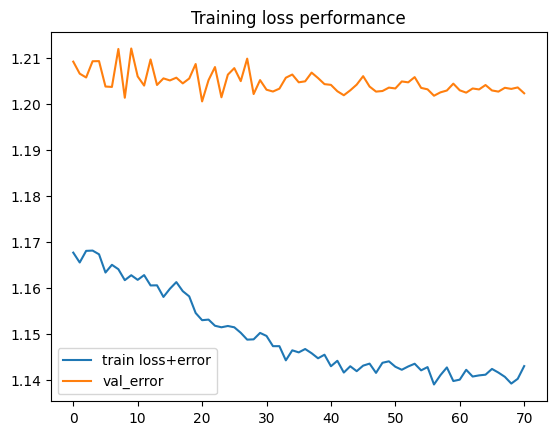

In [15]:

filepath = 'weights/weights.h5'
history = model.fit(X_train,
    Y_train,
    batch_size=400,
    epochs=100,
    verbose=2,
    validation_data=[X_val,Y_val],
    callbacks = [
                keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
                keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,verbose=1,patince=5,min_lr=0.000001),
                keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='auto')
                #keras.callbacks.TensorBoard(log_dir='./logs/',histogram_freq=1,write_graph=False,write_grads=1,write_images=False,update_freq='epoch')
                ]
                    )

mltools.show_history(history)

344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5595 - loss: 1.1972
[1.20633864402771, 0.5535681843757629]
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


FileNotFoundError: [Errno 2] No such file or directory: 'figure/cnn2_total_confusion.png'

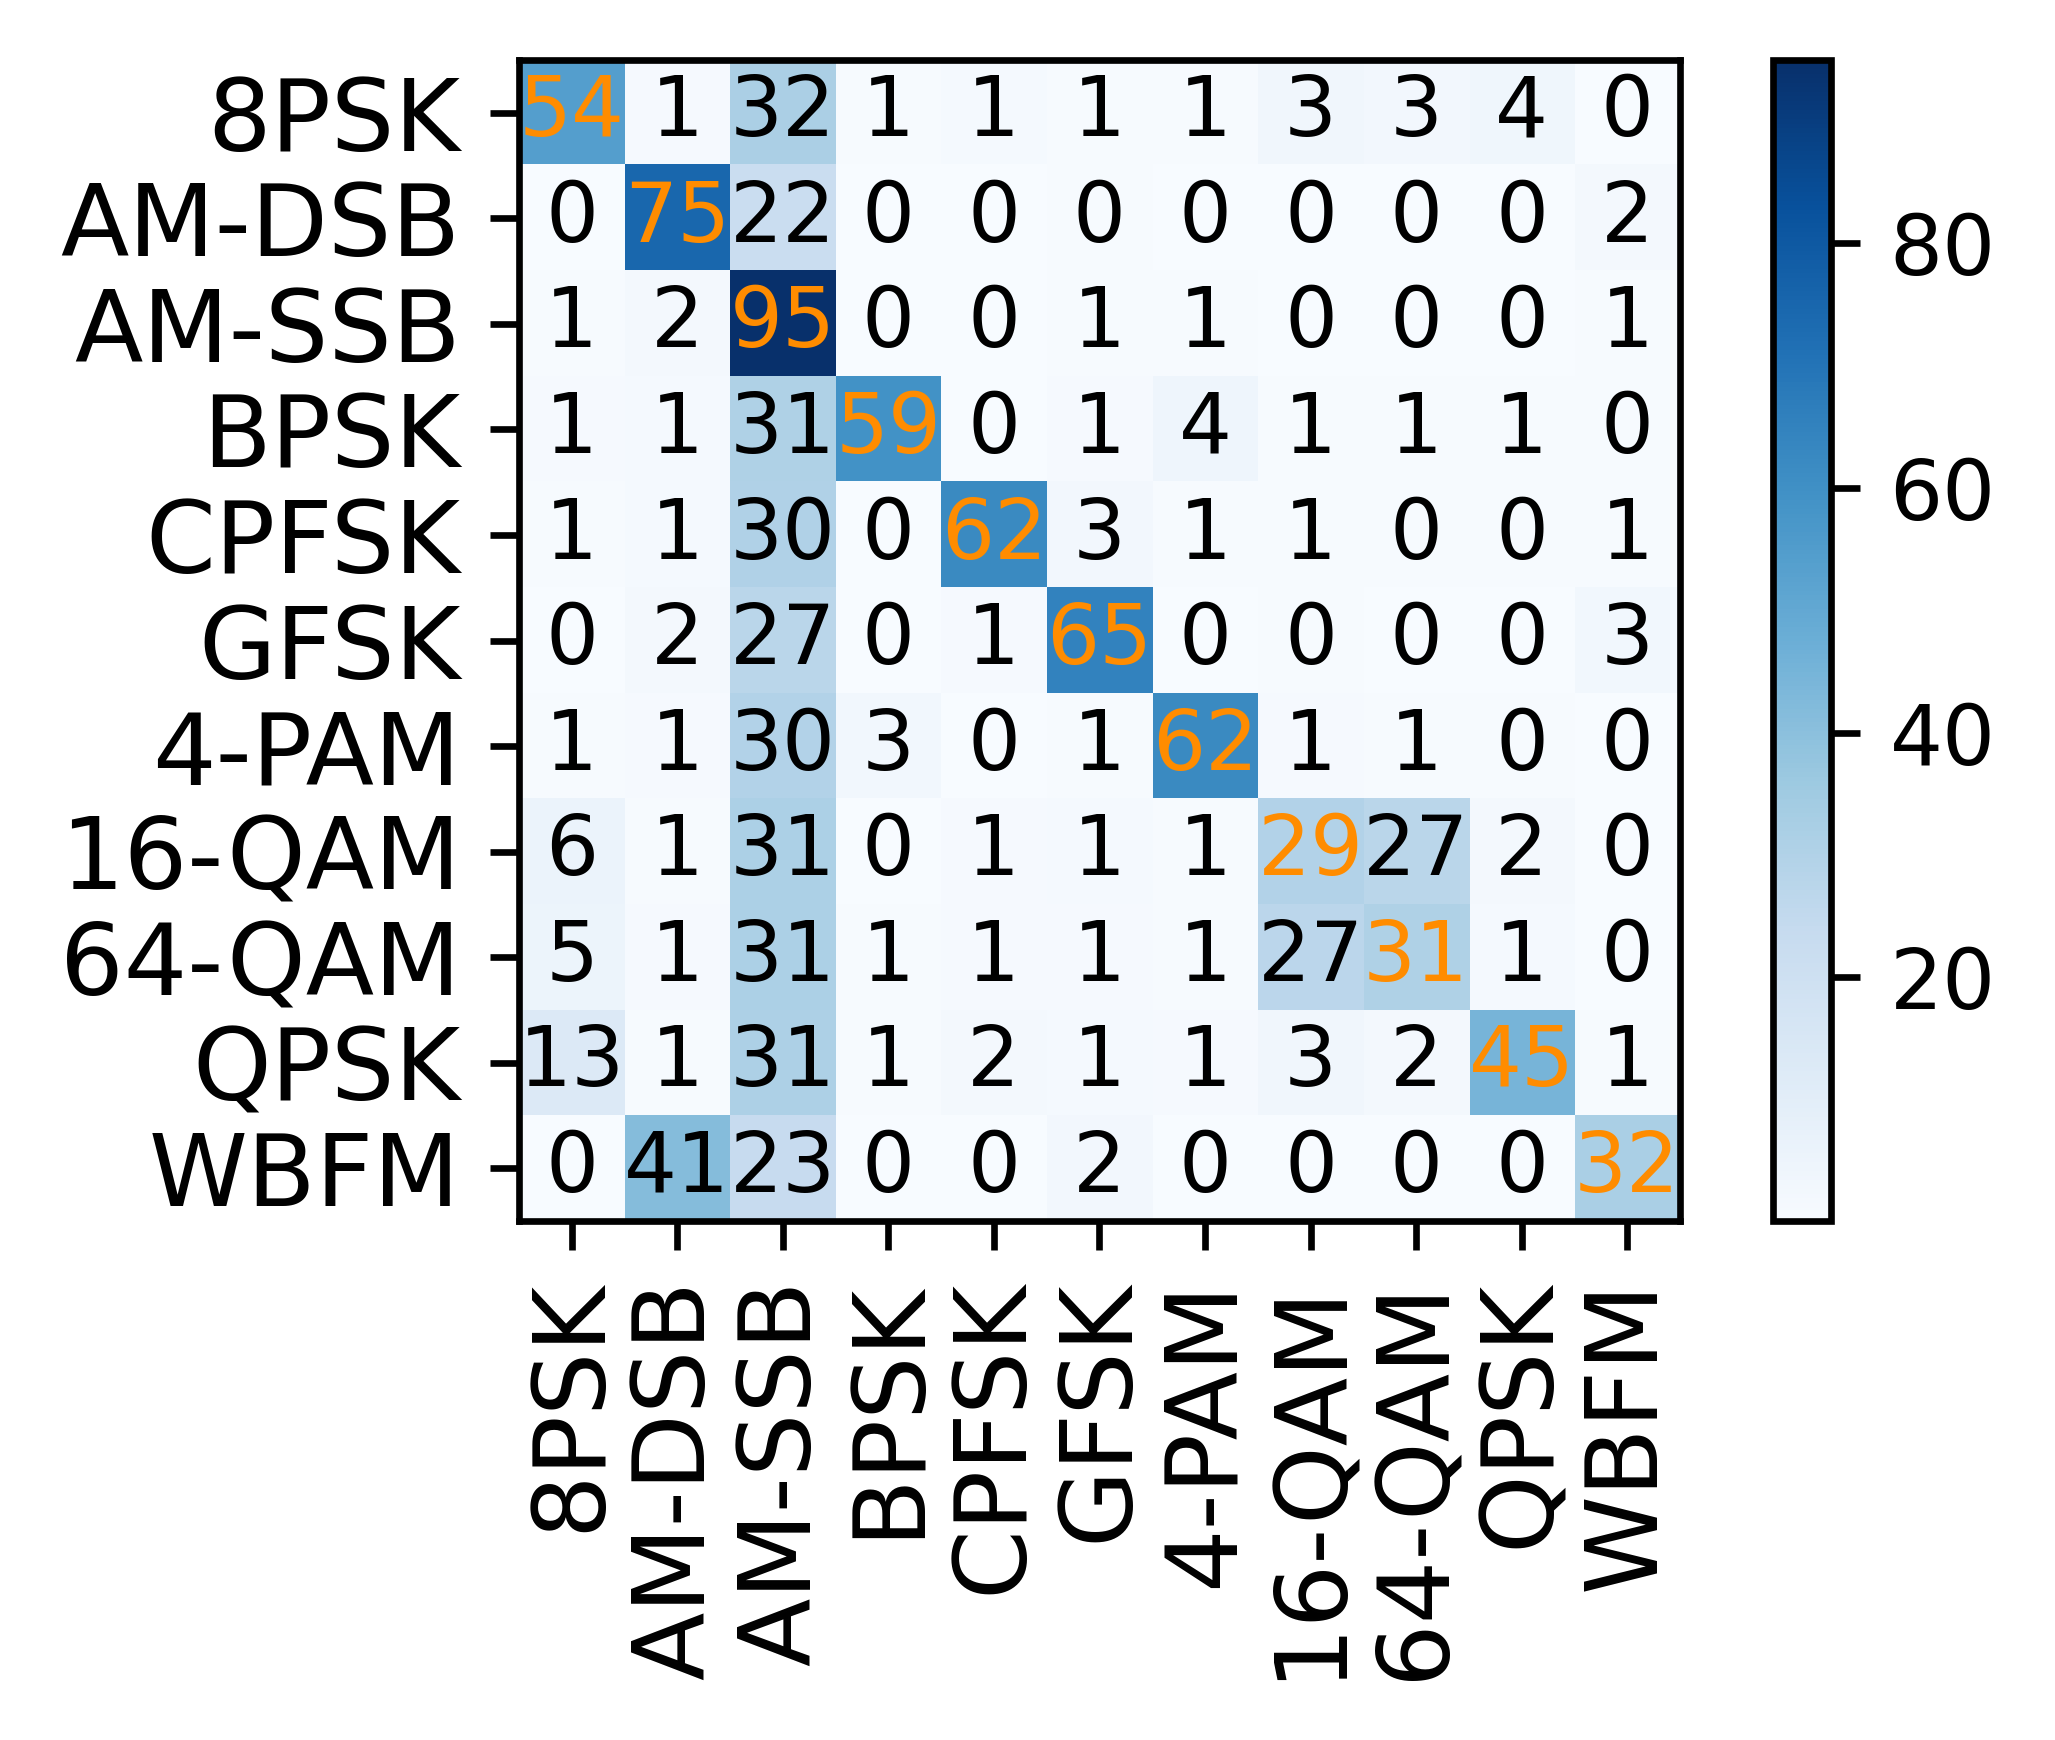

In [16]:
score = model.evaluate(X_test, Y_test, verbose=1, batch_size=batch_size)
print(score)

def predict(model):
    # Plot confusion matrix
    model.load_weights(filepath)
    test_Y_hat = model.predict(X_test, batch_size=batch_size)
    confnorm,_,_ = mltools.calculate_confusion_matrix(Y_test,test_Y_hat,classes)
    mltools.plot_confusion_matrix(confnorm, labels=['8PSK','AM-DSB','AM-SSB','BPSK','CPFSK','GFSK','4-PAM','16-QAM','64-QAM','QPSK','WBFM'],save_filename='figure/cnn2_total_confusion')

    # Plot confusion matrix
    acc = {}
    acc_mod_snr = np.zeros( (len(classes),len(snrs)) )
    i = 0
    for snr in snrs:

        # extract classes @ SNR
        # test_SNRs = map(lambda x: lbl[x][1], test_idx)
        test_SNRs = [lbl[x][1] for x in test_idx]

        test_X_i = X_test[np.where(np.array(test_SNRs) == snr)]
        test_Y_i = Y_test[np.where(np.array(test_SNRs) == snr)]

        # estimate classes
        test_Y_i_hat = model.predict(test_X_i)
        confnorm_i,cor,ncor = mltools.calculate_confusion_matrix(test_Y_i,test_Y_i_hat,classes)
        acc[snr] = 1.0 * cor / (cor + ncor)
        result = cor / (cor + ncor)
        with open('acc111.csv', 'a', newline='') as f0:
            write0 = csv.writer(f0)
            write0.writerow([result])
        mltools.plot_confusion_matrix(confnorm_i, labels=['8PSK','AM-DSB','AM-SSB','BPSK','CPFSK','GFSK','4-PAM','16-QAM','64-QAM','QPSK','WBFM'], title="Confusion Matrix",save_filename="figure/Confusion(SNR=%d)(ACC=%2f).png" % (snr,100.0*acc[snr]))

        acc_mod_snr[:,i] = np.round(np.diag(confnorm_i)/np.sum(confnorm_i,axis=1),3)
        i = i +1

    #plot acc of each mod in one picture
    dis_num=11
    for g in range(int(np.ceil(acc_mod_snr.shape[0]/dis_num))):
        assert (0 <= dis_num <= acc_mod_snr.shape[0])
        beg_index = g*dis_num
        end_index = np.min([(g+1)*dis_num,acc_mod_snr.shape[0]])

        plt.figure(figsize=(12, 10))
        plt.xlabel("Signal to Noise Ratio")
        plt.ylabel("Classification Accuracy")
        plt.title("Classification Accuracy for Each Mod")

        for i in range(beg_index,end_index):
            plt.plot(snrs, acc_mod_snr[i], label=classes[i])
            # 设置数字标签
            for x, y in zip(snrs, acc_mod_snr[i]):
                plt.text(x, y, y, ha='center', va='bottom', fontsize=8)

        plt.legend()
        plt.grid()
        plt.savefig('figure/acc_with_mod_{}.png'.format(g+1))
        plt.close()
    #save acc for mod per SNR
    fd = open('predictresult/acc_for_mod_on_cnn2.dat', 'wb')
    pickle.dump(('128','cnn2', acc_mod_snr), fd)
    fd.close()

    # Save results to a pickle file for plotting later
    print(acc)
    fd = open('predictresult/cnn2_d0.5.dat','wb')
    pickle.dump( ("CNN2", 0.5, acc) , fd )

    # Plot accuracy curve
    plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
    plt.xlabel("Signal to Noise Ratio")
    plt.ylabel("Classification Accuracy")
    plt.title("Classification Accuracy on RadioML 2016.10 Alpha")
    plt.tight_layout()
    plt.savefig('figure/each_acc.png')
    plt.close()
predict(model)